## IMPORTING THE RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## LOADING THE RAW DATA

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive statistics of the variables

In [5]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variables of interest 

In [6]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
#we can remove less than 5% of thedata if it is necessary
data_no_mvalues = data.dropna(axis=0)

In [9]:
data_no_mvalues.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Distribution Func. curves


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

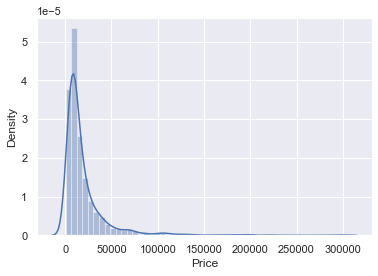

In [10]:
# plot using seaaborn
sns.distplot(data_no_mvalues['Price'])

### Dealing with outliers 

In [15]:
#consider 99% of the data set and drop 1% as it is an outlier
outlier_price= data_no_mvalues['Price'].quantile(0.99)
data_1 = data_no_mvalues[data_no_mvalues['Price'] < outlier_price]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

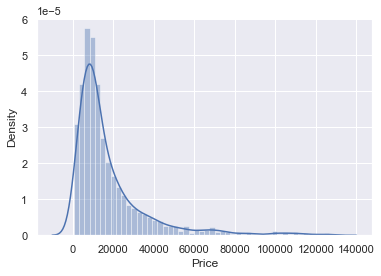

In [16]:
#plot chesi chudu... outliers are dropped
sns.distplot(data_1['Price'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

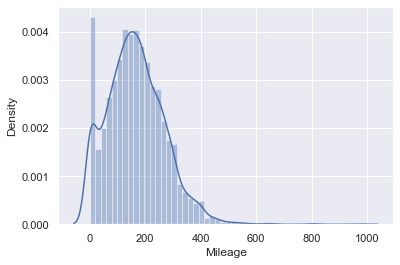

In [13]:
#similarly check other features (variables)
sns.distplot(data_1['Mileage'])

In [14]:
outlier_mileage = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < outlier_mileage]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

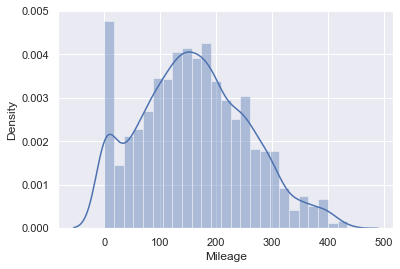

In [15]:
sns.distplot(data_2['Mileage'])

In [16]:
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

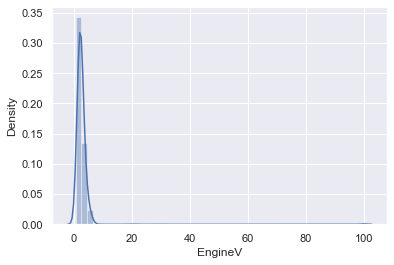

In [17]:
sns.distplot(data_2['EngineV'])

In [18]:
#Buhahaha... cars' engine volume dont exceed 6.5,don't believe go google it.
data_3 = data_2[data_2['EngineV'] < 6.5]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

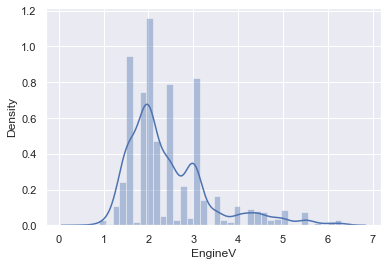

In [19]:
sns.distplot(data_3['EngineV'])

In [20]:
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

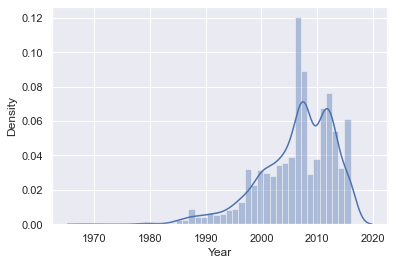

In [21]:
sns.distplot(data_3['Year'])

In [22]:
outlier_year = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > outlier_year]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

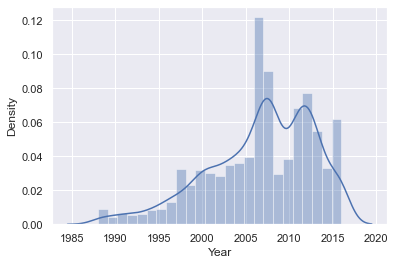

In [23]:
sns.distplot(data_4['Year'])

In [24]:
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [25]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [26]:
#the removed records leave the vacant indexing so... we need to reset them 
#and when we reset, the old index creates another columnn and we dont need it
#so drop = True will delete the old attribute of index
data_4 = data_4.reset_index(drop=True)

## Checking OLS assumptions


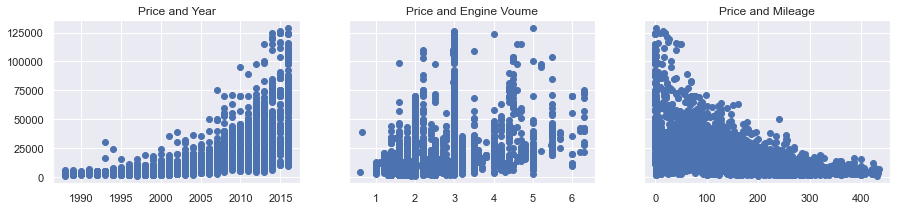

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey= True, figsize= (15,3))
ax1.scatter(data_4['Year'],data_4['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_4['EngineV'],data_4['Price'])
ax2.set_title('Price and Engine Voume')
ax3.scatter(data_4['Mileage'], data_4['Price'])
ax3.set_title('Price and Mileage')
plt.show()

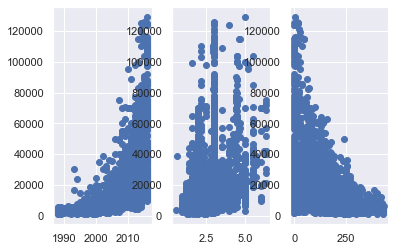

In [28]:
# This is my version- We can also plot like this but its not professional
plt.subplot(1,3,1).scatter(data_4['Year'],data_4['Price'])
plt.subplot(1,3,2).scatter(data_4['EngineV'],data_4['Price'])
plt.subplot(1,3,3).scatter(data_4['Mileage'],data_4['Price'])

In [29]:
#sisnce the distribution looks like exponential distribution
#TRANSFORM IT !!! and it can be done with the help of mr.Numpy sir
log_price = np.log(data_4['Price'])

#and now add it in dataframe
data_4['log price']= log_price
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'log price and Mileage')

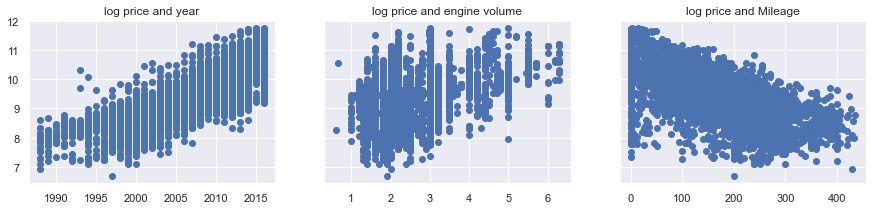

In [30]:
#so now plot all the graphs with log_price once again
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey= True, figsize= (15,3))
ax1.scatter(data_4['Year'],data_4['log price'])
ax1.set_title('log price and year')
ax2.scatter(data_4['EngineV'],data_4['log price'])
ax2.set_title('log price and engine volume')
ax3.scatter(data_4['Mileage'],data_4['log price'])
ax3.set_title('log price and Mileage')


##### There is no endogeneity, Normality, zero mean is considered here... and the regression graph too.. it follows homoscedasticity bcs we already implemented log transform.. and finally the observations we have is not a time series data so there is no autocorrelation

# Check for multicollinearity

In [31]:
data_cleaned = data_4.drop(['Price'], axis=1)

In [32]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log price'], dtype=object)

In [72]:
#its logical that year and mileage will be corellated
#new car has less mileage
#sklearn dont have any methods to check for multicollinearity
#so we need our old friend to help us: 'Statsmodels' and use VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(features.values,i)
                                    for i in range(features.shape[1])]
vif['Features'] = variables.columns
vif

,Variance Inflation Factor,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [34]:
#vif=1 i.e. no multi collinearity
#1<vif<5 its perfectly ok
#vif>10 not accepted at all
#year has high multi collinearity... so dropit
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### Creating dummies for Ctegorical data 

In [74]:
#game with numbers is completed... it's time to dealwith categorical data
#so we need to create dummy variables
#pandas have easy built in method to create dummies
#and dont forget to drop one of the dummies, to avoid multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Rearrange and place the Target in first column 

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
rearrangement = ['log price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
data_preprocessed = data_with_dummies[rearrangement]
data_preprocessed.head()

,log price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### The preprocessing is done time for linear regression model

## LINEAR REGRESSION MODEL

In [39]:
#Declare the independent variables/ inputs(features) and dependent variable(Target)
target = data_preprocessed['log price']
inputs = data_preprocessed.drop(['log price'],axis = 1)


## scale data or standardization

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #creating scaler object
scaler.fit(inputs) #calculated feature wise mean and sd
inputs_scaled = scaler.transform(inputs) #calculated Z or standardised valuea


### Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

### tried creating somethin' else 

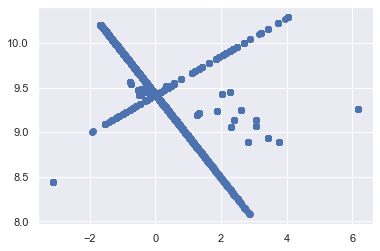

In [81]:
reg= LinearRegression()
reg.fit(x_train, y_train)
#plt.scatter(x_train,y_train)
yhat = reg.coef_ * x_train + reg.intercept_
fig = plt.scatter(x_train, yhat)

In [85]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

(6.0, 13.0)

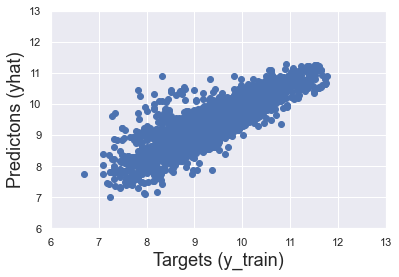

In [87]:
#check wether your regression model predicts the original data correctly
#i.e. the original data say y_train, your predicted data say yhat
#they should match with each other
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictons (yhat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

#cool they almost match with each other giving 45 degrees line

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

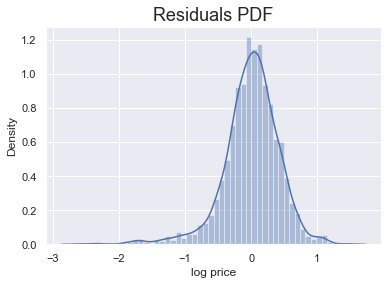

In [45]:
#or we can also plot residuals i.e. difference b/w them 
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)
#cool this looks like a normal distribution 
#the left side extension i.e. y hat value is over predicted than y train data

In [46]:
#calculate Rsquared
reg.score(x_train,y_train)
#that means our model explains 75% variability of given data

0.7546487921881218

### Finding weights and bias

In [47]:
#bias is the intercept
reg.intercept_

9.421003614148074

In [48]:
#weights are the coefficients and this is an array
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [49]:
#create a regression summary table of weights and features and compare
reg_summary = pd.DataFrame()
reg_summary['Features'] = inputs.columns
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [50]:
data_cleaned['Brand'].unique()
#the minus values show inverse relation between price and feature
#for example more the mileage covered less will be the price given to the car
#same for the brands.. as we dropped audi dummy... the values which are negative are with respect to audi
#audi has more cost than its respective negative brands for eg. toyota
#and vice versa with positive like BMW 

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Finally Testing

In [51]:
#testing should be done with a data set which our model didnt see
#we already have that dataset i.e. x_test and y_test
y_hat_test = reg.predict(x_test)

(6.0, 13.0)

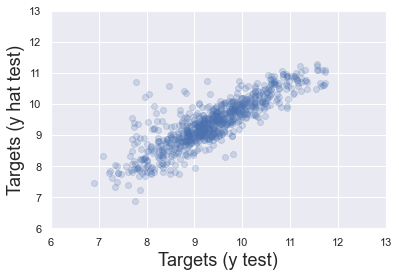

In [53]:
#time to plot graph between our predicted and actual test dataset

plt.scatter(y_test, y_hat_test, alpha=0.2) #here alpha is opacity to check the concentration
plt.xlabel('Targets (y test)', size=18)
plt.ylabel('Targets (y hat test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)


### So that is our model

In [57]:
#lets check those values manually in a dataframe
final_dataframe = pd.DataFrame()
final_dataframe['Predicted values'] = np.exp(y_hat_test)
final_dataframe.head()

,Predicted values
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [58]:
#lets compare them with respective y test values
final_dataframe['Actual values'] = np.exp(y_test)
final_dataframe


,Predicted values,Actual values
0,40419.308971,4200.0
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN
...,...,...
769,4699.586013,NaN
770,9123.067372,NaN
771,6267.803094,NaN
772,20906.128600,NaN


In [59]:
#oh... oh... what just happened? why are there null values?
#let's check whats wrong with y_test values
y_test


2174     9.966462
1420     9.093807
2478     8.086410
1584     9.392662
952      8.594154
          ...    
2683     8.342840
1159     9.082507
2447     8.486734
2458    10.203592
691      9.296518
Name: log price, Length: 774, dtype: float64

In [61]:
#there you go... the indices values are random... but why?
#because when we splitted y into test and train data... they got randomised...
#now we need to reset them
y_test = y_test.reset_index(drop=True)

y_test
 #now its ordered try adding into data frame once again

0       9.966462
1       9.093807
2       8.086410
3       9.392662
4       8.594154
         ...    
769     8.342840
770     9.082507
771     8.486734
772    10.203592
773     9.296518
Name: log price, Length: 774, dtype: float64

In [62]:
final_dataframe['Actual values'] = np.exp(y_test)
final_dataframe

,Predicted values,Actual values
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [67]:
#thats the comparision.. lets check the diffeerence between them 
#since they are residuals or errors... finding them shows accuracy
final_dataframe['Residuals'] = final_dataframe['Actual values']-final_dataframe['Predicted values']
final_dataframe['Difference%'] = np.absolute(final_dataframe['Residuals']/final_dataframe['Actual values']*100)
final_dataframe

,Predicted values,Actual values,Residuals,Difference%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


## Descriptive statistics of our model

In [68]:
final_dataframe.describe(include = 'all')

,Predicted values,Actual values,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [70]:
pd.options.display.max_rows= 999
final_dataframe.sort_values(by= ['Difference%'])

,Predicted values,Actual values,Residuals,Difference%
387,13602.753468,13600.00,-2.753468,0.020246
74,28889.063628,28900.00,10.936372,0.037842
314,35530.207664,35500.00,-30.207664,0.085092
336,11313.265936,11300.00,-13.265936,0.117398
425,2995.676139,3000.00,4.323861,0.144129
262,52180.113403,52055.25,-124.863403,0.239867
674,3107.506596,3100.00,-7.506596,0.242148
648,9675.565748,9700.00,24.434252,0.251900
79,21407.589940,21335.00,-72.589940,0.340239
313,9865.724471,9900.00,34.275529,0.346217


##                        THE END 